In [1]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

df = pd.read_csv("D:\Princy\Internship\Edunet\Project\Hopsital Dataset.csv")
print(df.shape)
df.head()

(833, 10)


,Age,Date of Data Entry,Gender,Diagnosis,Name of Drug,Dosage (gram),Route,Frequency,Duration (days),Indication
0,85,19/12/2019 14:41:49,Female,"ccf, hypertension, ida, ckd(stage 5), ?icm,",ceftriaxone,1,IV,BD,7,icm
1,87,19/12/2019 16:35:25,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1,IV,BD,1,post op
2,82,19/12/2019 15:48:49,Male,"type-2dm, ihd, col, copd, ht",ofloxacin,0.4,IV,BD,3,abd distension with leg swelling
3,82,19/12/2019 15:50:33,Male,"type-2 dm, ihd, col, copd, ht",cefipime,1,IV,BD,5,abd distension with leg swelling
4,82,19/12/2019 15:52:20,Male,"type-2 dm, ihd, col, copd, ht",azithromycin,0.5,Oral,OD,3,abd distension with leg swelling


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 833 non-null    object
 1   Date of Data Entry  833 non-null    object
 2   Gender              833 non-null    object
 3   Diagnosis           833 non-null    object
 4   Name of Drug        833 non-null    object
 5   Dosage (gram)       833 non-null    object
 6   Route               833 non-null    object
 7   Frequency           833 non-null    object
 8   Duration (days)     833 non-null    object
 9   Indication          832 non-null    object
dtypes: object(10)
memory usage: 65.2+ KB


In [55]:
df['Age2'] = pd.to_numeric(df['Age'],errors='coerce')
df['Dosage (gram)2'] = pd.to_numeric(df['Dosage (gram)'],errors='coerce')
df['Duration (days)2'] = pd.to_numeric(df['Duration (days)'],errors='coerce')
df['Date of Data Entry2'] = pd.to_datetime(df['Date of Data Entry'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Age                  833 non-null    object        
 1   Date of Data Entry   833 non-null    object        
 2   Gender               833 non-null    object        
 3   Diagnosis            833 non-null    object        
 4   Name of Drug         833 non-null    object        
 5   Dosage (gram)        833 non-null    object        
 6   Route                833 non-null    object        
 7   Frequency            833 non-null    object        
 8   Duration (days)      833 non-null    object        
 9   Indication           832 non-null    object        
 10  Age2                 832 non-null    float64       
 11  Dosage (gram)2       831 non-null    float64       
 12  Duration (days)2     831 non-null    float64       
 13  Date of Data Entry2  831 non-null  

C:\Users\Princy\AppData\Local\Temp\ipykernel_3412\3541614966.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date of Data Entry2'] = pd.to_datetime(df['Date of Data Entry'],errors='coerce')


In [56]:
df[(df['Dosage (gram)2'].isnull())
  | (df['Duration (days)2'].isnull())
  | (df['Age2'].isnull())
  | (df['Date of Data Entry2'].isnull())
  ]

,Age,Date of Data Entry,Gender,Diagnosis,Name of Drug,Dosage (gram),Route,Frequency,Duration (days),Indication,Age2,Dosage (gram)2,Duration (days)2,Date of Data Entry2
528,82,Time,Sex,Diagnosis,Drugs,Dosage,Route,Freq,Duration,Indication,82.0,NaN,NaN,NaT
529,Age,#REF!,Sex,Diagnosis,Name of Drug,Dosage (gram),Route,Frequency,Duration (days),Indication,NaN,NaN,NaN,NaT


In [57]:
df = df[~((df['Dosage (gram)2'].isnull())
  | (df['Duration (days)2'].isnull())
  | (df['Age2'].isnull())
  | (df['Date of Data Entry2'].isnull()))
  ]

df['Age'] = df['Age2'].astype('int')
df['Dosage (gram)'] = df['Dosage (gram)2']
df['Date of Data Entry'] = df['Date of Data Entry2']
df['Duration (days)'] = df['Duration (days)2'].astype('int')
df = df.drop(['Age2','Dosage (gram)2','Date of Data Entry2','Duration (days)2'],axis=1)

print(df.shape)
df.head()

(831, 10)


,Age,Date of Data Entry,Gender,Diagnosis,Name of Drug,Dosage (gram),Route,Frequency,Duration (days),Indication
0,85,2019-12-19 14:41:49,Female,"ccf, hypertension, ida, ckd(stage 5), ?icm,",ceftriaxone,1.0,IV,BD,7,icm
1,87,2019-12-19 16:35:25,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1.0,IV,BD,1,post op
2,82,2019-12-19 15:48:49,Male,"type-2dm, ihd, col, copd, ht",ofloxacin,0.4,IV,BD,3,abd distension with leg swelling
3,82,2019-12-19 15:50:33,Male,"type-2 dm, ihd, col, copd, ht",cefipime,1.0,IV,BD,5,abd distension with leg swelling
4,82,2019-12-19 15:52:20,Male,"type-2 dm, ihd, col, copd, ht",azithromycin,0.5,Oral,OD,3,abd distension with leg swelling


In [58]:
df.describe(include='all')


,Age,Date of Data Entry,Gender,Diagnosis,Name of Drug,Dosage (gram),Route,Frequency,Duration (days),Indication
count,831.000000,831,831,831,831,831.000000,831,831,831.000000,830
unique,NaN,NaN,2,263,55,NaN,3,4,NaN,220
top,NaN,NaN,Male,"ccf, koch's lung, copd, chest infection, pre-d...",ceftriaxone,NaN,IV,BD,NaN,chest infection
freq,NaN,NaN,449,20,221,NaN,534,430,NaN,92
mean,51.194946,2019-12-19 15:18:12.971119360,NaN,NaN,NaN,5.048959,NaN,NaN,3.789410,NaN
min,1.000000,2019-12-19 13:49:27,NaN,NaN,NaN,0.020000,NaN,NaN,1.000000,NaN
25%,38.000000,2019-12-19 14:35:20,NaN,NaN,NaN,0.500000,NaN,NaN,1.000000,NaN
50%,52.000000,2019-12-19 15:13:40,NaN,NaN,NaN,1.000000,NaN,NaN,3.000000,NaN
75%,65.000000,2019-12-19 16:07:45,NaN,NaN,NaN,1.000000,NaN,NaN,5.000000,NaN
max,90.000000,2019-12-19 18:25:06,NaN,NaN,NaN,960.000000,NaN,NaN,28.000000,NaN


In [59]:
display(df['Route'].value_counts())
print()
df['Frequency'].value_counts()

Route
IV      534
Oral    293
IM        4
Name: count, dtype: int64

Frequency
BD     430
TDS    283
OD     110
QID      8
Name: count, dtype: int64

In [60]:
df['Diagnosis'].value_counts()


Diagnosis
ccf, koch's lung, copd, chest infection, pre-diabetes                               20
general debility e excessive vomitting, uraemic gastritis, hcv aki ckd, retro(+)    18
rvi stage 3, ht disease, renal impairment, koch's lungs, ccf, increased lft         18
severe anaemia,  multiple myeloma,  CKD,  chest infection                           16
neutropenia, fever, anaemia, ca buffalo mucosa, type 2 dm                           15
                                                                                    ..
af,  is he mic hd,  type2 dm,  newly dx rvi                                          1
he, alcoholic hepatitis,  col,  portal ht,  hma,  uti                                1
he,  alcoholic hepatitis,  alcohol col,  portal ht,  hma, uti                        1
acute bronchitis                                                                     1
uti,  operated spinal cord,  hematoma and paraplegia                                 1
Name: count, Length: 263, dtype: 

There are 35359 words in the combination of all diagnosis.


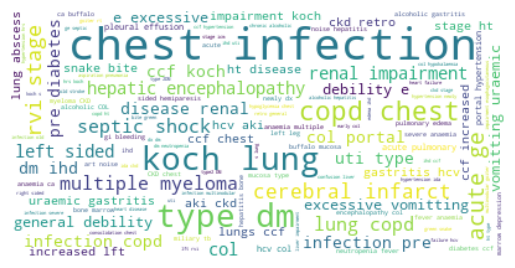

In [61]:
text = " ".join(diagnosis for diagnosis in df.Diagnosis)
print ("There are {} words in the combination of all diagnosis.".format(len(text)))

stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
A = collections.Counter([i.strip().lower() 
  for i in text.split(',') if (i.strip().lower()) not in stopwords ])
print('Top 10 words/phrases')
display(A.most_common(10))
print('\nBottom 10 words/phrases')
display(A.most_common()[-11:-1])

Top 10 words/phrases


[('col', 77),
 ('chest infection', 68),
 ('ihd', 55),
 ('copd', 40),
 ('hypertension', 38),
 ('ccf', 36),
 ('type 2 dm', 32),
 ("koch's lung", 28),
 ('ckd', 28),
 ('uraemic gastritis', 18)]


Bottom 10 words/phrases


[('poorly controlled dm complicated uti', 1),
 ('poorly controlled dm septic shock', 1),
 ('hypertension hepatitis', 1),
 ('uti hepatitis', 1),
 ('uti uti', 1),
 ('cff ppt by chest infection early col', 1),
 ('operated spinal cord', 1),
 ('hematoma and paraplegia he', 1),
 ('rvi with col glandular fever', 1),
 ('fever with confusion ccf', 1)]

In [63]:
display(df['Indication'].value_counts())
print()
df['Indication'].value_counts(1)

Indication
chest infection            92
col                        32
uti                        30
type 2 dm                  25
prevention of infection    22
                           ..
pad(lt u.l)                 1
old stroke                  1
fainting attack             1
cheat infection             1
centepede bite              1
Name: count, Length: 220, dtype: int64

Indication
chest infection            0.110843
col                        0.038554
uti                        0.036145
type 2 dm                  0.030120
prevention of infection    0.026506
                             ...   
pad(lt u.l)                0.001205
old stroke                 0.001205
fainting attack            0.001205
cheat infection            0.001205
centepede bite             0.001205
Name: proportion, Length: 220, dtype: float64

In [64]:
top_indications = df['Indication'].value_counts(1).reset_index()
top_indications['cum_proportion'] = top_indications['proportion'].cumsum()
top_indications = top_indications[top_indications['cum_proportion']<0.25]
top_indications

,Indication,proportion,cum_proportion
0,chest infection,0.110843,0.110843
1,col,0.038554,0.149398
2,uti,0.036145,0.185542
3,type 2 dm,0.030120,0.215663
4,prevention of infection,0.026506,0.242169


In [65]:
display(df['Name of Drug'].nunique())
display(df['Name of Drug'].value_counts())

55

Name of Drug
ceftriaxone                    221
co-amoxiclav                   162
metronidazole                   59
cefixime                        58
septrin                         37
clarithromycin                  32
levofloxacin                    31
amoxicillin+flucloxacillin      29
ceftazidime                     24
cefepime                        14
cefipime                        13
clindamycin                     12
rifaximin                       10
amikacin                         9
cefoperazone                     9
coamoxiclav                      9
meropenem                        8
ciprofloxacin                    7
gentamicin                       5
pen v                            5
rifampicin                       5
azithromycin                     5
cifran                           4
mirox                            4
amoxicillin                      4
streptomycin                     4
ceftazidine                      4
clarthromycin                    4
amoxici

In [66]:
top_drugs = (df['Name of Drug'].value_counts(1).reset_index())
top_drugs['cum_proportion'] = top_drugs['proportion'].cumsum()
top_drugs = top_drugs.head()
top_drugs

,Name of Drug,proportion,cum_proportion
0,ceftriaxone,0.265945,0.265945
1,co-amoxiclav,0.194946,0.460890
2,metronidazole,0.070999,0.531889
3,cefixime,0.069795,0.601685
4,septrin,0.044525,0.646209


In [67]:
(df[(df['Indication'].isin(top_indications['Indication']))
   &(df['Name of Drug'].isin(top_drugs['Name of Drug']))]
.pivot_table(index='Indication',columns='Name of Drug',values='Age',aggfunc='count')
)

Name of Drug,cefixime,ceftriaxone,co-amoxiclav,metronidazole,septrin
Indication,,,,,
chest infection,7.0,22.0,27.0,3.0,1.0
col,1.0,14.0,3.0,3.0,1.0
prevention of infection,2.0,6.0,3.0,2.0,1.0
type 2 dm,2.0,7.0,4.0,1.0,NaN
uti,3.0,9.0,2.0,NaN,NaN


In [68]:
(df[df['Indication'].isin(top_indications['Indication'])]
.groupby('Indication')['Age']
.agg(['mean','median','count'])
)

,mean,median,count
Indication,,,
chest infection,57.173913,61.5,92
col,48.031250,48.0,32
prevention of infection,42.136364,46.0,22
type 2 dm,63.560000,62.0,25
uti,50.233333,53.5,30


In [69]:
(df[df['Name of Drug'].isin(top_drugs['Name of Drug'])]
.groupby('Name of Drug')['Age']
.agg(['mean','median','count']).sort_values(by='median')
)

,mean,median,count
Name of Drug,,,
septrin,44.513514,40.0,37
cefixime,43.137931,42.0,58
ceftriaxone,50.484163,49.0,221
metronidazole,53.661017,54.0,59
co-amoxiclav,56.518519,60.0,162


In [70]:
adf = df.copy()
adf['Output'] = np.where(df['Name of Drug'].isin(top_drugs['Name of Drug']),
                    df['Name of Drug'],'Other')
adf['Output'].value_counts()

Output
Other            294
ceftriaxone      221
co-amoxiclav     162
metronidazole     59
cefixime          58
septrin           37
Name: count, dtype: int64

In [71]:
vectorizer = CountVectorizer(max_features=150,stop_words='english',
              ngram_range=(1,3))
X = vectorizer.fit_transform(adf['Diagnosis'].str.lower())
vectorizer.get_feature_names_out()

array(['abscess', 'acute', 'acute ge', 'af', 'aki', 'aki ckd',
       'aki ckd retro', 'alcoholic', 'anaemia', 'art', 'bite', 'bleeding',
       'bone', 'ca', 'cap', 'ccf', 'ccf chest', 'ccf chest infection',
       'ccf increased', 'ccf increased lft', 'ccf koch', 'ccf koch lung',
       'cerebral', 'cerebral infarct', 'chest', 'chest infection',
       'chest infection pre', 'chronic', 'ckd', 'ckd chest infection',
       'ckd retro', 'col', 'col portal', 'col portal hypertension',
       'copd', 'copd chest', 'copd chest infection', 'debility',
       'debility excessive', 'debility excessive vomitting', 'diabetes',
       'disease', 'disease renal', 'disease renal impairment', 'dm',
       'dm ihd', 'edema', 'effusion', 'encephalopathy', 'excessive',
       'excessive vomitting', 'excessive vomitting uraemic', 'failure',
       'fever', 'gastritis', 'gastritis hcv', 'gastritis hcv aki', 'ge',
       'general', 'general debility', 'general debility excessive',
       'gi bleeding', 

In [72]:
feature_df = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
feature_df['Age'] = adf['Age'].fillna(0).astype('int')
feature_df['Gender_Male'] = np.where(adf['Gender']=='Male',1,0)


le = LabelEncoder()
feature_df['Output'] = le.fit_transform(adf['Output'])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
  feature_df.drop('Output',axis=1).fillna(-1), 
  feature_df['Output'], 
  test_size=0.2, random_state=42)

In [74]:
clf = RandomForestClassifier(max_depth=6, random_state=0, 
  class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=0)

In [75]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
final_accuracy = clf.score(X_train, y_train)
print("final_accuracy is : ",final_accuracy)

# creating a confusion matrix for determining and visualizing the accuracy score
clf_predict = clf.predict(X_train)
print(classification_report(y_train, clf_predict))

final_accuracy is :  0.411144578313253
              precision    recall  f1-score   support

           0       0.84      0.30      0.44       236
           1       0.16      0.86      0.27        49
           2       0.74      0.26      0.39       176
           3       0.48      0.47      0.48       127
           4       0.39      0.59      0.47        49
           5       0.45      0.93      0.61        27

    accuracy                           0.41       664
   macro avg       0.51      0.57      0.44       664
weighted avg       0.64      0.41      0.43       664



In [76]:
cm = confusion_matrix(y_train,clf_predict)
cm

array([[71, 88, 11, 37, 19, 10],
       [ 0, 42,  0,  4,  3,  0],
       [10, 75, 46, 23, 15,  7],
       [ 3, 38,  4, 60,  9, 13],
       [ 1, 19,  0,  0, 29,  0],
       [ 0,  1,  1,  0,  0, 25]], dtype=int64)

<Axes: >

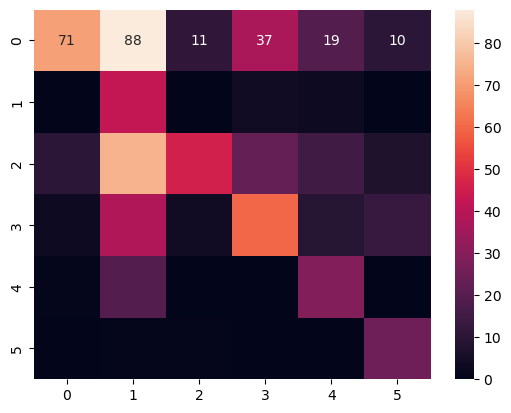

In [77]:
sns.heatmap(cm,annot=True)